<a href="https://colab.research.google.com/github/nguyenhoang47/AI/blob/main/MONANVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
folder = '/content/drive/MyDrive/mon an truyen thong/' 
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('banh_bo'):
    output= 1.0
  if file.startswith('banh_bot_loc'):
    output= 2.0
  if file.startswith('banh_cong'):
    output= 3.0
  if file.startswith('banh_da_lon'):
    output= 4.0
  if file.startswith('banh_mi'):
    output= 5.0
  if file.startswith('banh_tai_heo'):
    output= 6.0
  if file.startswith('banh_tieu'):
    output= 7.0
  if file.startswith('banh_trung_thu'):
    output= 8.0
  if file.startswith('banh_xeo'):
    output= 9.0
   
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [57]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/colab', photos)
save('/content/drive/MyDrive/colab', labels)
     

(10, 40, 40, 3) (10,)


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]


In [62]:

print(test_x.shape, train_x.shape)

(0, 40, 40, 3) (10, 40, 40, 3)


In [63]:
train_x = train_x.reshape((10, 40, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((0, 40, 40, 3))
test_x = test_x.astype('float32')/255

In [64]:

from keras.utils import to_categorical
train_y = to_categorical(train_y,10)
test_y = to_categorical(test_y,10)

In [65]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 10
classes = 10

In [66]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [67]:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                        

In [68]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 2.3087 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1.6511 - accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 2.3507 - accuracy: 0.2000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 2.2236 - accuracy: 0.1000
Epoch 5/10
1/1 [==============================] - 1s 736ms/step - loss: 2.0875 - accuracy: 0.1000
Epoch 6/10
1/1 [==============================] - 1s 737ms/step - loss: 1.7167 - accuracy: 0.1000
Epoch 7/10
1/1 [==============================] - 1s 798ms/step - loss: 1.3600 - accuracy: 0.6000
Epoch 8/10
1/1 [==============================] - 1s 736ms/step - loss: 1.2068 - accuracy: 0.6000
Epoch 9/10
1/1 [==============================] - 1s 854ms/step - loss: 1.1021 - accuracy: 0.6000
Epoch 10/10
1/1 [==============================] - 1s 737ms/step - loss: 1.0757 - accuracy: 0.6000


In [71]:
model.save('/mon an truyen thong/Notebooks Data foodVieNam.h5')

1/1 [==============================] - 0s 239ms/step



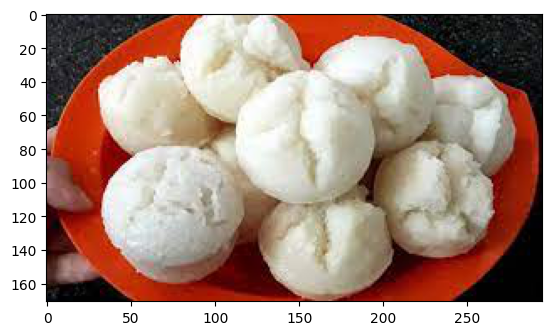

1/1 [==============================] - 0s 61ms/step



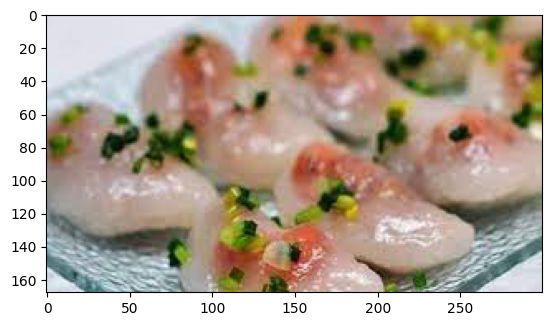

1/1 [==============================] - 0s 52ms/step



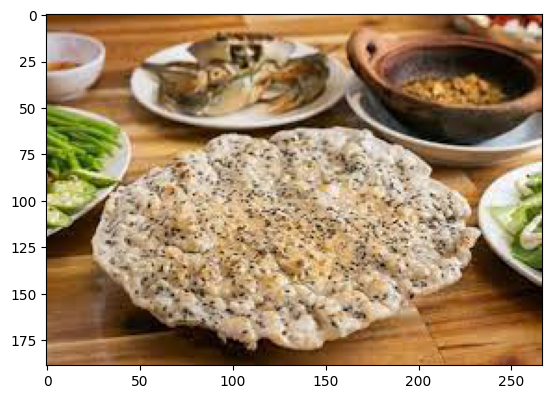

1/1 [==============================] - 0s 55ms/step
banh_tieu


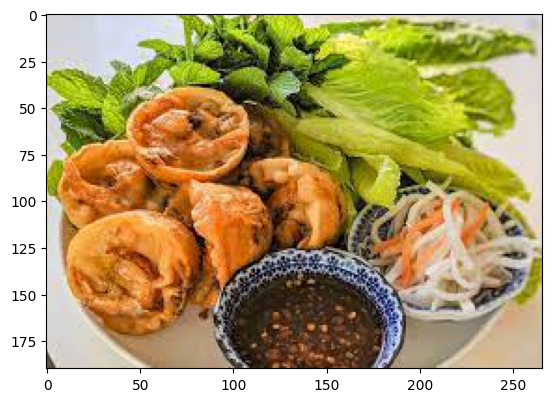

1/1 [==============================] - 0s 46ms/step
banh_tieu


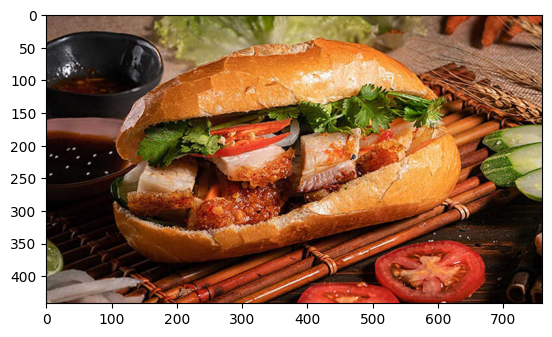

1/1 [==============================] - 0s 53ms/step
banh_tieu


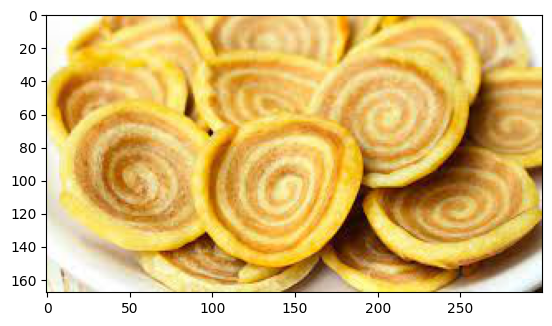

1/1 [==============================] - 0s 39ms/step
banh_tieu


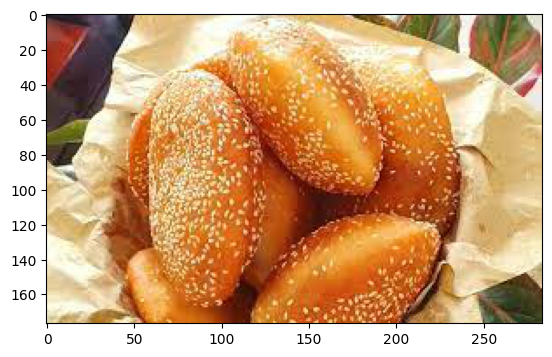

1/1 [==============================] - 0s 45ms/step



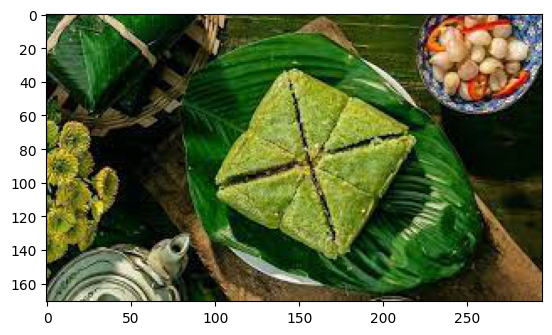

1/1 [==============================] - 0s 49ms/step
banh_tieu


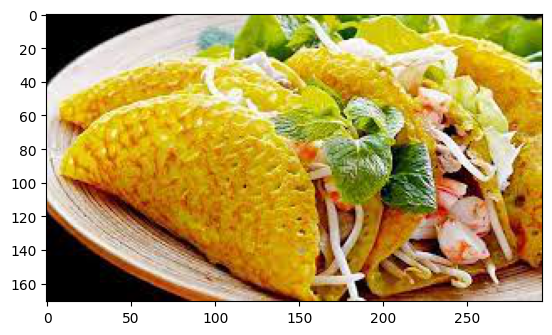

1/1 [==============================] - 0s 45ms/step



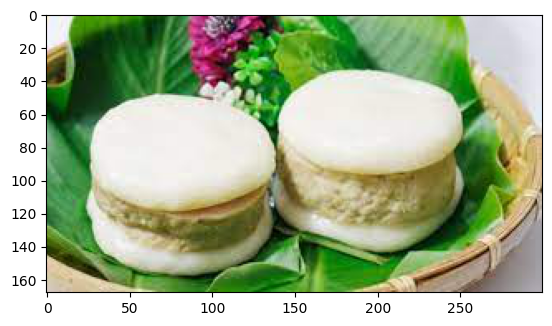

IsADirectoryError: ignored

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/mon an truyen thong/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','banh_bo', 'banh_bot_loc', 'banh_cong', 'banh_da_lon', 'banh_mi', 'banh_tai_heo', 'banh_tieu', 'banh_trung_thu', 'banh_xeo']
  print(class_name[result])
  plt.show()